# Group/Individual Challenge!

Radiative transfer codes are then used by observers do a kind of reverse-engineering to go from observations to physical conditions in the remote ISM. Typically, one uses them to compute a whole grid of solutions (observed line intensities) that correspond to different combinations of physical gas properties (density, column density, and temperature). Standard inputs include a turbulent line width (measured from the observed line profiles) and a data file that contains the Einstein A and collisional excitation rates for a given molecule. 

The goal is then to find the set of conditions that best match the observed line properties (the line intensity and in some cases, if you have additional constraints, the line opacity). 

A simple, publicly-available radiative transfer code (based on escape probability for turbulent clouds) is Radex:

http://var.sron.nl/radex/radex.php

Radex can be run online by selecting a molecule and giving it a single set of input parameters. 

Use the online version of Radex to compute and examine how the intensity of the lowest 4 rotational lines of CO vary as you adjust the temperature, density, and column density. 

Start with initial values of 10^4, 10^15, and 30 K. Adopt a line width of 1 km/s, and assume the only radiation background is the CMB. 

(a) vary the density from 10^2 to 10^6

(b) vary the temperature from 10 K to 200 K

(c) vary the column density from 10^14 to 10^16


For each set of parameters, plot the line intensity (in units of brightness temperature, or K) as a function of the energy of the upper J level of the transition 

As a reminder, E = 5.5 K, 16.6 K, 33.2 K , 55.3 K for J = 1, 2, 3, 4



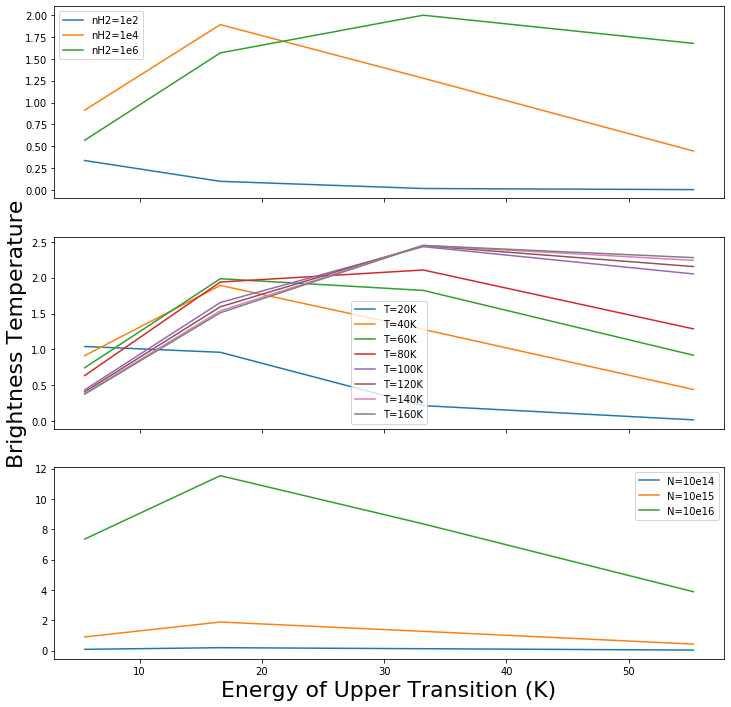

In [11]:
import numpy as np                          # I use this for maths and sometimes arrays.
                                            # "np" is just an abbreviation since we call this package so often!
import pylab                                # I use this for arrays and plotting sometimes
import matplotlib
import matplotlib.pyplot as plt                    # Standard plotting package
import scipy

from astropy import units as u              # This one helps with unit conversion
from astropy.io import fits


                                            # Super important!! 
                                            # This embeds plots in the Jupyter window 
                                            # (instead of showing them as pop-ups)
%matplotlib inline                             

plt.rc('font', family='sans-serif')  # Set plot fonts
plt.rc('text', usetex=True)      
plt.rc('text', usetex=False)        # This is a quick fix if you don't have latex on your computer

energy = [5.5,16.6,33.2,55.3] #J = 1, 2, 3, 4

n_data = np.array([[5.5,16.6,33.2,55.3], #J
                 [3.357e-01,9.676e-02,1.462e-02,1.905e-03],#nH2 = 1e2
                 [9.124e-01,1.893e+00,1.279e+00,4.444e-01],#nH2 = 1e4
                 [5.674e-01,1.569e+00,2.001e+00,1.678e+00]])#nH2 = 1e6

T_data = np.array([[1.04,0.959,0.214,0.0158], #T=20K then progresses in increments of 20
                    [0.912,1.893,1.279,0.44],
                    [0.743,1.986,1.823,0.918],
                    [0.634,1.94,2.108,1.286],
                    [0.562,1.867,2.264,1.556],
                    [0.4678,1.72,2.404,1.923],
                    [0.435,1.654,2.434,2.053],
                    [0.408,1.594,2.448,2.156],
                    [0.384,1.538,2.451,2.243],
                    [0.374,1.511,2.451,2.281]])

N_data = np.array([[0.0935,0.202,0.135,0.0447], #Column density in increments of power 10
                     [0.912,1.893,1.279,0.44],
                    [7.359,11.54,8.361,3.891]])


fig, axs = plt.subplots(3,sharex=True, figsize=(12,12))


axs[0].plot(n_data[0,:],n_data[1,:],label="nH2=1e2")
axs[0].plot(n_data[0,:],n_data[2,:],label="nH2=1e4")
axs[0].plot(n_data[0,:],n_data[3,:],label="nH2=1e6")
axs[0].legend()

axs[1].plot(n_data[0,:],T_data[0,:],label="T=20K")
axs[1].plot(n_data[0,:],T_data[1,:],label="T=40K")
axs[1].plot(n_data[0,:],T_data[2,:],label="T=60K")
axs[1].plot(n_data[0,:],T_data[3,:],label="T=80K")
axs[1].plot(n_data[0,:],T_data[6,:],label="T=100K")
axs[1].plot(n_data[0,:],T_data[7,:],label="T=120K")
axs[1].plot(n_data[0,:],T_data[8,:],label="T=140K")
axs[1].plot(n_data[0,:],T_data[9,:],label="T=160K")
axs[1].set_ylabel("Brightness Temperature", fontsize=22)
axs[1].legend()

axs[2].plot(n_data[0,:],N_data[0,:],label="N=10e14")
axs[2].plot(n_data[0,:],N_data[1,:],label="N=10e15")
axs[2].plot(n_data[0,:],N_data[2,:],label="N=10e16")
axs[2].set_xlabel("Energy of Upper Transition (K)",fontsize=22)
axs[2].legend()

plt.show()


What's the reason for the brightness temperature going dow as the energy of the transition increases? Is it because these levels are typically not as densely populated?